<a href="https://colab.research.google.com/github/datamongerbonny/geopy-notebooks/blob/main/10_BrazilDataCubeAWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install stac.py

     |████████████████████████████████| 51 kB 275 kB/s 
  Created wheel for stac.py: filename=stac.py-0.9.0.post13-py3-none-any.whl size=49122 sha256=5b2eb62c16dda7cb392ecfea28722b8ee3ed4b8c89680e164aaa930230a26789
  Stored in directory: /root/.cache/pip/wheels/1c/c1/a6/29a677fd6928583dcf4e4ed2b75b5d9ecd076e1e1e9cd67083
Successfully built stac.py


In [ ]:
import stac
import os
import glob
import subprocess
import requests
from tqdm.notebook import tqdm
import time
import datetime
import numpy as np

In [ ]:
from stac import STAC

In [ ]:
!pip install git+https://github.com/brazil-data-cube/sample.py@v0.8.0

  Cloning https://github.com/brazil-data-cube/sample.py (to revision v0.8.0) to /tmp/pip-req-build-kr3ujcdz
  Running command git clone -q https://github.com/brazil-data-cube/sample.py /tmp/pip-req-build-kr3ujcdz
  Running command git checkout -q fff33dd30e372412b8b9fbf9061a52a069a69d02
  Cloning https://github.com/brazil-data-cube/lccs.py.git (to revision v0.8.0) to /tmp/pip-install-17upvbr6/lccs_7013792b862c485d948a0194a0807174
  Running command git clone -q https://github.com/brazil-data-cube/lccs.py.git /tmp/pip-install-17upvbr6/lccs_7013792b862c485d948a0194a0807174
  Running command git checkout -q d404e0e4b1f7e0ebacee1156b8a626ddf1b9c625
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 58.4 MB/s 
     |████████████████████████████████| 16.7 MB 442 kB/s 
     |████████████████████████████████| 6.3 MB 51.7 MB/s 
  Created wheel for sample: filename=sample-0.8.0-py3-none-any.whl size=15820 sha256=8f3340f226efa72427faae0d576d31e0

In [ ]:
import sample

In [ ]:
service = sample.SAMPLE('https://brazildatacube.dpi.inpe.br/sample/', access_token='2fZYaNV0yVWzp7Qkq7atmK701x8sHRMVF7PSn42Mbd')

In [ ]:
service

sample(url="https://brazildatacube.dpi.inpe.br/sample")

In [ ]:
service.datasets

[{'id': 4, 'name': 'bdc-go-test-area', 'version': '1'},
 {'id': 2, 'name': 'insitu-br-mt-2K', 'version': '3'},
 {'id': 19, 'name': 'fao-fra-2017', 'version': '1'},
 {'id': 21, 'name': 'fip_bdc-cerrado-2015_2016', 'version': '1'},
 {'id': 3, 'name': 'bdc-ba-test-area', 'version': '1'},
 {'id': 6, 'name': 'bdc-all-test-area', 'version': '1'},
 {'id': 8, 'name': 'bdc-ba-test-area', 'version': '2'},
 {'id': 20, 'name': 'fip_bdc-cerrado-2019', 'version': '1'},
 {'id': 31, 'name': 'lapig-tvi-treinamento', 'version': '1'},
 {'id': 1, 'name': 'insitu-br-mt-1.8k', 'version': '3'},
 {'id': 29, 'name': 'lem-benchmark', 'version': '1'},
 {'id': 10, 'name': 'bdc-all-test-area', 'version': '2'},
 {'id': 28, 'name': 'lem-benchmark-plus', 'version': '1'},
 {'id': 32, 'name': 'lapig-mapbiomas-validacao-1985_2018', 'version': '1'},
 {'id': 30, 'name': 'lapig-tvi-validacao', 'version': '1'},
 {'id': 7, 'name': 'inpe-campo-verde-database', 'version': '1'},
 {'id': 5, 'name': 'bdc-mt-test-area', 'version':

In [ ]:
ds = service.dataset(dataset_name='mapbiomas-val-past-col6-2020', dataset_version=1)
ds

{'classification_system_id': 45,
 'classification_system_name': 'Campanha-Inspeção-Visual-Mapbiomas-Col-6',
 'classification_system_version': '1',
 'collect_method_id': 2,
 'collect_method_name': 'VISUAL',
 'dataset_table_id': 3912132,
 'description': 'Conjunto georreferenciado de pontos para todo o território brasileiro, sendo atribuídas classes de pastagem e não pastagem referente ao ano de 2020. Foram utilizadas imagens semestrais de Sentinel 2 através da plataforma GEE e utilizando o software Qgis.',
 'end_date': '2020-12-31T00:00:00Z',
 'id': 35,
 'is_public': True,
 'metadata_json': None,
 'name': 'mapbiomas-val-past-col6-2020',
 'number_of_features': 136912,
 'start_date': '2020-01-01T00:00:00Z',
 'title': 'Mapbiomas-6 - Visualmente Inspecionados',
 'user_id': 2,
 'version': '1',
 'version_predecessor': None,
 'version_successor': None}

In [ ]:
ds.metadata

In [ ]:
bdc_obs = ds.data()

In [ ]:
bdc_obs.head()

geometry  class_id          class_name collection_date  \
0  POINT (-56.56947 -29.79573)       911  Pastagem Cultivada            None   
1  POINT (-54.56174 -20.89378)       912        Não Pastagem            None   
2   POINT (-41.96610 -2.79614)       912        Não Pastagem            None   
3   POINT (-51.80562 -3.71808)       912        Não Pastagem            None   
4   POINT (-56.94784 -4.20048)       912        Não Pastagem            None   

             created_at              end_date    id            start_date  \
0  2022-03-07T12:58:11Z  2020-12-31T00:00:00Z  1430  2020-01-01T00:00:00Z   
1  2022-03-07T12:58:11Z  2020-12-31T00:00:00Z  1431  2020-01-01T00:00:00Z   
2  2022-03-07T12:58:11Z  2020-12-31T00:00:00Z  1432  2020-01-01T00:00:00Z   
3  2022-03-07T12:58:11Z  2020-12-31T00:00:00Z  1433  2020-01-01T00:00:00Z   
4  2022-03-07T12:58:11Z  2020-12-31T00:00:00Z  1434  2020-01-01T00:00:00Z   

             updated_at  user_id  
0  2022-03-07T12:58:11Z        2  
1  2022-03-07T12:58:11Z        2  
2  2022-03-07T12:58:11Z        2  
3  2022-03-07T12:58:11Z        2  
4  2022-03-07T12:58:11Z        2

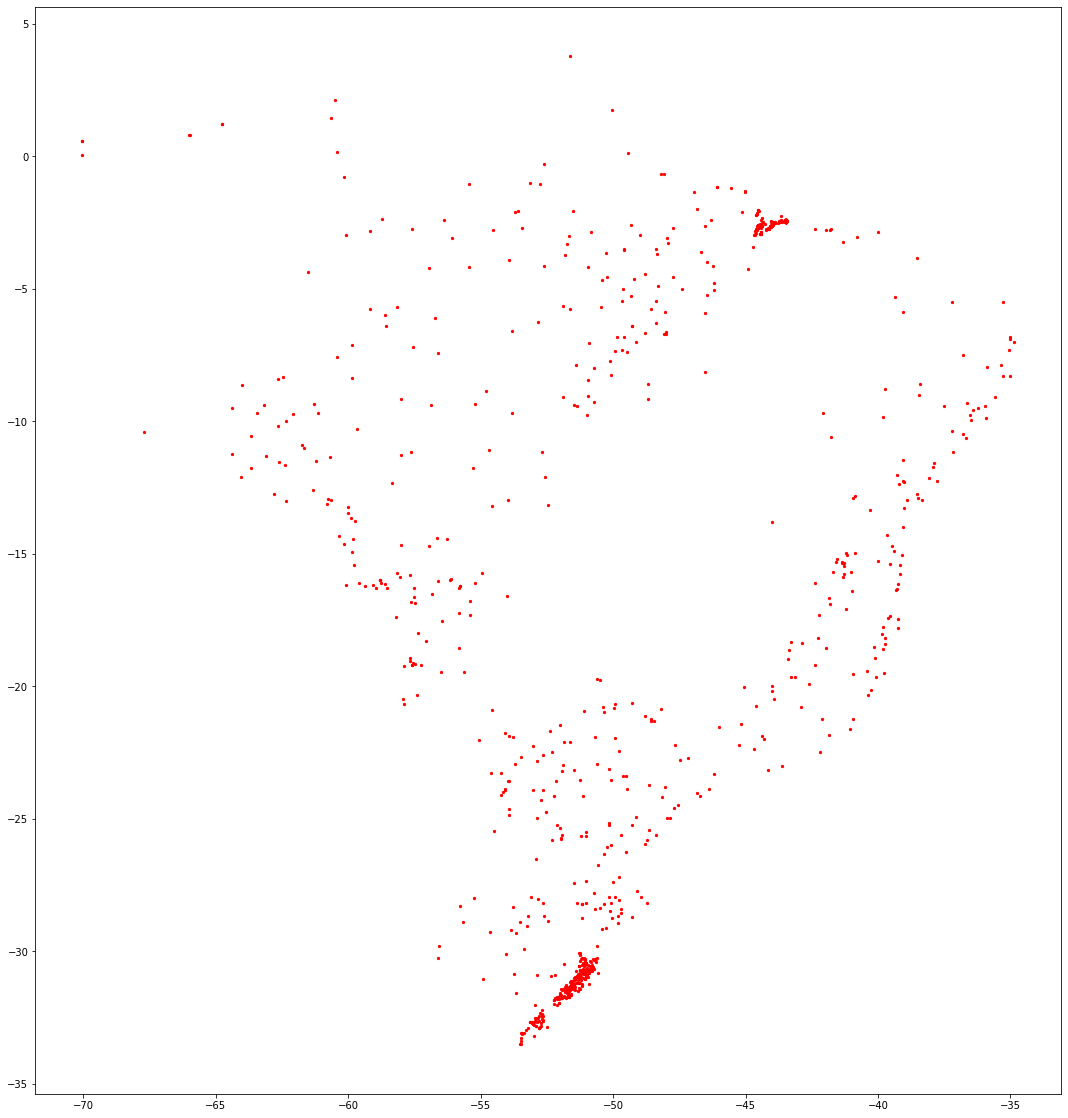

In [ ]:
bdc_obs.plot( marker='o', color='red', markersize=5, figsize=(20, 20));


In [ ]:
import geopandas as gpd
from matplotlib import pyplot as plt

In [ ]:
file_biomas = "https://geoftp.ibge.gov.br/informacoes_ambientais/estudos_ambientais/biomas/vetores/Biomas_250mil.zip"
file_uf = "https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2020/Brasil/BR/BR_UF_2020.zip"



In [ ]:
# Load the biomas data of IBGE
biomas = gpd.read_file(file_biomas)

In [ ]:
biomas

Bioma  CD_Bioma                                           geometry
0        Amazônia         1  MULTIPOLYGON (((-44.08515 -2.41669, -44.08560 ...
1        Caatinga         2  POLYGON ((-41.74080 -2.80826, -41.73673 -2.809...
2         Cerrado         3  POLYGON ((-43.39009 -2.33937, -43.38741 -2.342...
3  Mata Atlântica         4  MULTIPOLYGON (((-48.70814 -28.44851, -48.70994...
4           Pampa         5  POLYGON ((-52.82472 -27.46295, -52.81558 -27.4...
5        Pantanal         6  POLYGON ((-57.75946 -15.72779, -57.75659 -15.7...

In [ ]:
uf = gpd.read_file(file_uf)


In [ ]:
uf.head()


CD_UF     NM_UF SIGLA_UF NM_REGIAO  \
0    11  Rondônia       RO     Norte   
1    12      Acre       AC     Norte   
2    13  Amazonas       AM     Norte   
3    14   Roraima       RR     Norte   
4    15      Pará       PA     Norte   

                                            geometry  
0  POLYGON ((-65.38150 -10.42907, -65.38013 -10.4...  
1  POLYGON ((-71.07772 -9.82774, -71.07817 -9.828...  
2  POLYGON ((-69.83766 -3.68659, -69.82555 -3.620...  
3  POLYGON ((-63.96008 2.47313, -63.96041 2.47416...  
4  MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ...

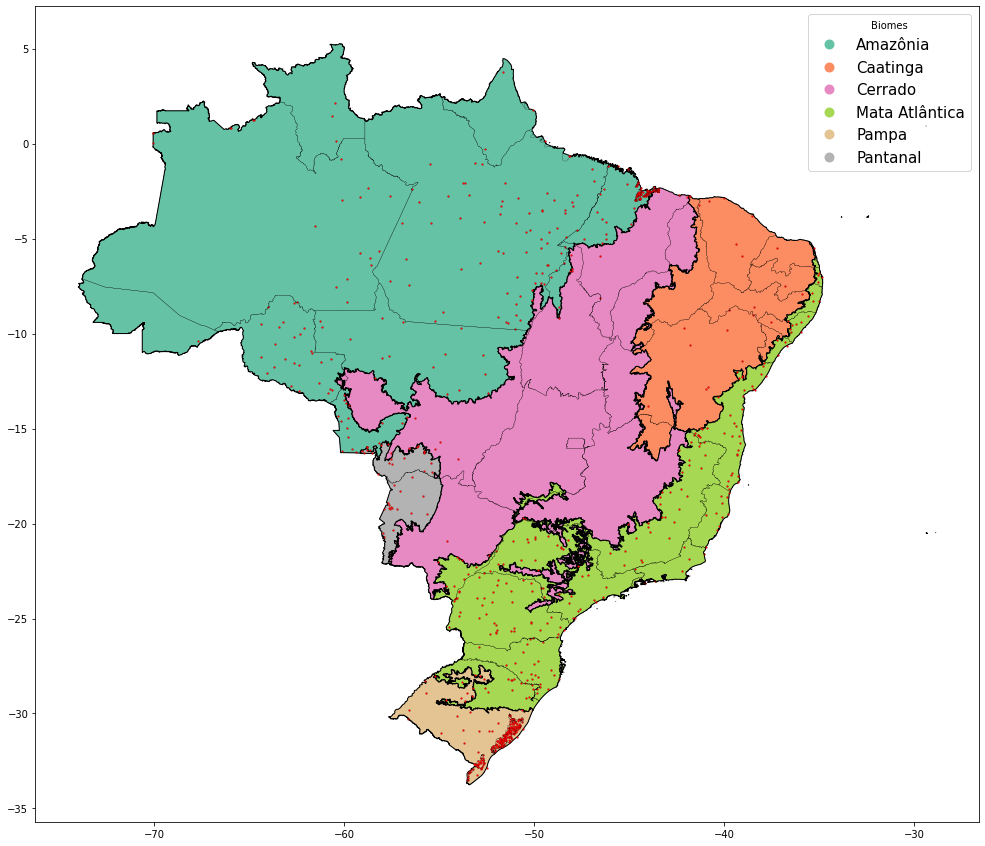

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))

biomas.plot(ax=ax, cmap='Set2', column='Bioma',edgecolor='black', legend=True,legend_kwds={'title': "Biomes", 'fontsize': 15})

uf.geometry.boundary.plot(ax=ax, color=None, edgecolor='black',linewidth = 0.2)

bdc_obs.plot(ax=ax, marker='o', color='red', markersize=4, edgecolor='black', linewidth = 0.1);

In [ ]:
collection = service.collection('S2_L1C-1') # 'S2_L2A-1' for Sentinel
collection

{'bdc:composite_function': None,
 'bdc:grs': 'MGRS',
 'bdc:metadata': {'datacite': {'contributors': [{'contributorType': 'HostingInstitution',
     'name': 'National Institute for Space Research (INPE)',
     'nameType': 'Organizational'},
    {'contributorType': 'ResearchGroup', 'name': 'Brazil Data Cube Team'}],
   'creators': [{'@type': 'Organization',
     'familyName': 'European Space Agency (ESA)'}],
   'dates': [{'date': '2020'}],
   'descriptions': [{'description': "The Sentinel-2 Level-1C image collection provides orthorectified Top-Of-Atmosphere (TOA) reflectance images obtained from the Copernicus Open Access Hub. According to the ESA's web site, the Copernicus Sentinel-2 mission comprises a constellation of two polar-orbiting satellites placed in the same sun-synchronous orbit, phased at 180° to each other. It has a swath width of 290 km and a revisit time of 10 days at the equator with one satellite, and 5 days with 2 satellites. For more information on Sentinel-2, please, see https://sentinel.esa.int/web/sentinel/missions/sentinel-2. This copy of the dataset was collected and made available by the Brazil Data Cube project, a component of the Environmental Monitoring of Brazilian Biomes project, funded by the Amazon Fund through the financial collaboration of the Brazilian Development Bank (BNDES) and the Foundation for Science, Technology and Space Applications (FUNCATE) no. 17.2.0536.1.",
     'descriptionType': 'Abstract',
     'lang': 'en'}],
   'formats': [],
   'fundingReferences': [{'funderName': 'Brazilian Development Bank (BNDES)'}],
   'geoLocations': [],
   'id': 'S2_L1C',
   'language': 'en',
   'relatedIdentifiers': [{'relatedIdentifier': 'https://sentinels.copernicus.eu/web/sentinel/user-guides/sentinel-2-msi',
     'relatedIdentifierType': 'URL',
     'relatedMetadataScheme': 'text/html',
     'relationType': 'IsDescribedBy',
     'resourceTypeGeneral': 'Text',
     'title': 'User Guides - Sentinel-2 MSI Introduction'},
    {'relatedIdentifier': 'https://sentinels.copernicus.eu/web/sentinel/technical-guides/sentinel-2-msi',
     'relatedIdentifierType': 'URL',
     'relatedMetadataScheme': 'text/html',
     'relationType': 'IsDescribedBy',
     'resourceTypeGeneral': 'Text',
     'title': 'Sentinel-2 MSI Technical Guide'},
    {'relatedIdentifier': '10.1109/LAGIRS48042.2020.9165649',
     'relatedIdentifierType': 'DOI',
     'relationType': 'IsCitedBy',
     'title': 'Using Remote Sensing Images and Cloud Services on AWS to Improve Land Use and Cover Monitoring'},
    {'relatedIdentifier': '10.3390/rs12244033',
     'relatedIdentifierType': 'DOI',
     'relationType': 'IsCitedBy',
     'title': 'Earth Observation Data Cubes for Brazil: Requirements, Methodology and Products'}],
   'rightsList': [{'rights': 'Copernicus Sentinel Data 2020',
     'rightsUri': 'https://sentinels.copernicus.eu/documents/247904/690755/Sentinel_Data_Legal_Notice'},
    {'rights': 'Terms and Conditions for the use and distribution of Sentinel Data',
     'rightsUri': 'https://scihub.copernicus.eu/twiki/pub/SciHubWebPortal/TermsConditions/TC_Sentinel_Data_31072014.pdf'}],
   'schemaVersion': 'http://datacite.org/schema/kernel-4',
   'sizes': [],
   'subjects': [{'lang': 'en', 'subject': 'Sentinel-2'},
    {'lang': 'en', 'subject': 'Sentinel-2A'},
    {'lang': 'en', 'subject': 'Sentinel-2B'},
    {'lang': 'en', 'subject': 'MSI'},
    {'lang': 'en', 'subject': 'Level-1C'},
    {'lang': 'en', 'subject': 'L-1C'},
    {'lang': 'en', 'subject': 'Top of Atmosphere Reflectance'},
    {'lang': 'en', 'subject': 'Brazil'}],
   'titles': {'lang': 'en', 'title': 'Sentinel-2 Level-1C'},
   'types': {'bibtex': 'misc',
    'citeproc': 'dataset',
    'resourceType': 'Dataset',
    'resourceTypeGeneral': 'Dataset',
    'ris': 'DATA',
    'schemaOrg': 'Dataset'},
   'version': '4.'},
  'processors': [],
  'sources': []},
 'bdc:tiles': ['18LWP',
  '18LWQ',
  '18LWR',
  '18LXN',
  '18LXP',
  '18LXQ',
  '18LXR',
  '18LYN',
  '18LYP',
  '18LYQ',
 

In [ ]:
collection.metadata

AttributeError: ignored

In [ ]:
!pip install pystac-client rasterio

     |████████████████████████████████| 63 kB 1.0 MB/s 
     |████████████████████████████████| 132 kB 11.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pystac_client

In [ ]:
pystac_client.__version__


'0.3.2'

In [ ]:
service = pystac_client.Client.open('https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/catalog.json')
service

<Client id=bdc-sentinel-2>

In [ ]:
for collection in service.get_collections():
    print(collection)


<CollectionClient id=S2-16D-1>


In [ ]:
collection = service.get_collection('S2-16D-1')
collection.to_dict()

{'bdc:bands_quicklook': ['B12', 'B8A', 'B04'],
 'bdc:composite_function': 'Stack',
 'bdc:crs': '+proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat_2=-22 +x_0=5000000 +y_0=10000000 +ellps=GRS80 +units=m +no_defs',
 'bdc:grs': 'BDC_SM',
 'bdc:metadata': {'license': 'MIT'},
 'bdc:temporal_composition': {'cycle': {'step': 1, 'unit': 'year'},
  'schema': 'cyclic',
  'step': '16',
  'unit': 'day'},
 'bdc:tiles': ['086101',
  '085082',
  '083090',
  '089102',
  '077094',
  '084113',
  '090105',
  '084087',
  '085104',
  '077090',
  '082089',
  '085110',
  '082092',
  '090088',
  '086112',
  '084108',
  '079086',
  '080082',
  '084114',
  '093099',
  '089089',
  '090094',
  '078097',
  '076091',
  '084092',
  '083114',
  '081107',
  '083084',
  '092105',
  '088095',
  '089094',
  '071092',
  '087106',
  '079091',
  '092099',
  '080087',
  '084100',
  '092093',
  '084089',
  '074089',
  '074087',
  '086083',
  '081097',
  '089095',
  '087095',
  '089105',
  '079087',
  '090095',
  '082107',
  '0910

In [ ]:
# Display an item only
catalog_201809 = pystac_client.Client.open('https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/catalog.json')

for item in catalog_201809.get_all_items():
    print(item)

<Item id=S2-16D_V1_079085_20180914>
<Item id=S2-16D_V1_079085_20180930>


In [ ]:
assets = item.assets


In [ ]:
blue_asset = assets['B02']
blue_asset


<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/14/S2-16D_V1_079085_20180914_B02.tif>

In [ ]:
for asset in assets.values():
    print(asset)

<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/14/S2-16D_V1_079085_20180914_B01.tif>
<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/14/S2-16D_V1_079085_20180914_B02.tif>
<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/14/S2-16D_V1_079085_20180914_B03.tif>
<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/14/S2-16D_V1_079085_20180914_B04.tif>
<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/14/S2-16D_V1_079085_20180914_B05.tif>
<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/14/S2-16D_V1_079085_20180914_B06.tif>
<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/14/S2-16D_V1_079085_20180914_B07.tif>
<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/14/S2-16D_V1_079085_20180914_B

In [ ]:
import rasterio

In [ ]:
with rasterio.open(assets['B08'].href) as nir_ds:
    nir = nir_ds.read(1)

In [ ]:
nir

array([[3846, 3645, 3334, ..., 3298, 3230, 3351],
       [3546, 3507, 3478, ..., 3587, 3518, 3483],
       [3183, 3388, 3798, ..., 3364, 3370, 3447],
       ...,
       [2878, 3250, 3848, ..., 2957, 3180, 3369],
       [3157, 3376, 3790, ..., 3001, 3214, 3277],
       [3676, 3527, 3489, ..., 2924, 3216, 3237]], dtype=int16)

In [ ]:
from rasterio.windows import Window

In [ ]:
def read(uri: str, window: Window, masked: bool = True):
    """Read raster window as numpy.ma.masked_array."""
    with rasterio.open(uri) as ds:
        return ds.read(1, window=window, masked=masked)

In [ ]:
red = read(assets['B04'].href, window=Window(0, 0, 500, 500)) # Window(col_off, row_off, width, height)
green = read(assets['B03'].href, window=Window(0, 0, 500, 500))
blue = read(assets['B02'].href, window=Window(0, 0, 500, 500))

In [ ]:
blue

masked_array(
  data=[[364, 345, 333, ..., 328, 323, 317],
        [361, 344, 330, ..., 330, 328, 328],
        [352, 336, 329, ..., 327, 320, 334],
        ...,
        [344, 354, 353, ..., 363, 349, 363],
        [342, 356, 360, ..., 399, 377, 372],
        [335, 376, 379, ..., 397, 387, 386]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=-9999,
  dtype=int16)

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

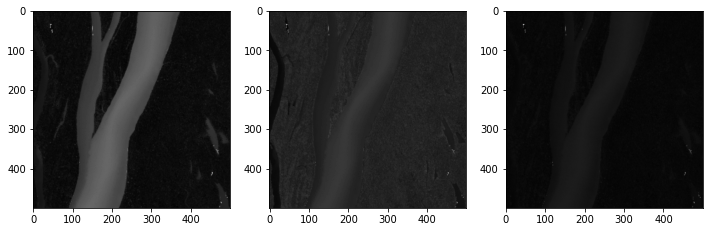

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12, 4))
ax1.imshow(red, cmap='gray')
ax2.imshow(green, cmap='gray')
ax3.imshow(blue, cmap='gray')

In [ ]:
import numpy

In [ ]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

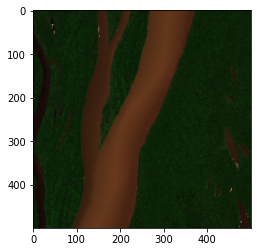

In [ ]:
rgb = numpy.dstack((normalize(red), normalize(green), normalize(blue)))
plt.imshow(rgb)

In [ ]:
import os
from urllib.parse import urlparse

import requests
from pystac import Asset
from tqdm import tqdm

def download(asset: Asset, directory: str = None, chunk_size: int = 1024 * 16, **request_options) -> str:
    """Smart download STAC Item asset.
    
    This method uses a checksum validation and a progress bar to monitor download status.
    """
    if directory is None:
        directory = ''

    response = requests.get(asset.href, stream=True, **request_options)
    output_file = os.path.join(directory, urlparse(asset.href)[2].split('/')[-1])
    os.makedirs(directory, exist_ok=True)
    total_bytes = int(response.headers.get('content-length', 0))
    with tqdm.wrapattr(open(output_file, 'wb'), 'write', miniters=1, total=total_bytes, desc=os.path.basename(output_file)) as fout:
        for chunk in response.iter_content(chunk_size=chunk_size):
            fout.write(chunk)

In [ ]:
download(assets['B08'], 'img')

S2-16D_V1_079085_20180914_B08.tif: 100%|██████████| 365M/365M [00:12<00:00, 31.0MB/s]


In [ ]:
for asset in assets.values():
    download(asset, 'images')

S2-16D_V1_079085_20180914_B01.tif: 100%|██████████| 159M/159M [00:06<00:00, 24.0MB/s]
S2-16D_V1_079085_20180914_B02.tif: 100%|██████████| 273M/273M [00:09<00:00, 30.8MB/s]
S2-16D_V1_079085_20180914_B03.tif: 100%|██████████| 299M/299M [00:10<00:00, 28.9MB/s]
S2-16D_V1_079085_20180914_B04.tif: 100%|██████████| 281M/281M [00:09<00:00, 31.0MB/s]
S2-16D_V1_079085_20180914_B05.tif: 100%|██████████| 299M/299M [00:10<00:00, 28.8MB/s]
S2-16D_V1_079085_20180914_B06.tif: 100%|██████████| 346M/346M [00:12<00:00, 29.3MB/s]
S2-16D_V1_079085_20180914_B07.tif: 100%|██████████| 354M/354M [00:12<00:00, 29.9MB/s]
S2-16D_V1_079085_20180914_B08.tif: 100%|██████████| 365M/365M [00:12<00:00, 31.1MB/s]
S2-16D_V1_079085_20180914_B09.tif: 100%|██████████| 316M/316M [00:11<00:00, 28.7MB/s]
S2-16D_V1_079085_20180914_B11.tif: 100%|██████████| 321M/321M [00:11<00:00, 30.3MB/s]
S2-16D_V1_079085_20180914_B12.tif: 100%|██████████| 292M/292M [00:09<00:00, 31.3MB/s]
S2-16D_V1_079085_20180914_B8A.tif: 100%|██████████| 35

In [ ]:
blue_asset.href

'https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/14/S2-16D_V1_079085_20180914_B02.tif'

In [ ]:
catalog_201809 = pystac_client.Client.open('https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/catalog.json')

for item in catalog_201809.get_all_items():
    print(item)

In [ ]:
# The following start date must be exactly the date of the first image
# to be used in the cube. Check in the previous results which image 
# covers your study area.
start_date = '2017-01-01' # date format: 'YYYY-MM-DD'
end_date   = '2020-12-31'

revisit_time = 5 # 16 for Landsat

dates = []

date = datetime.datetime.strptime(start_date, '%Y-%m-%d')
e_date = datetime.datetime.strptime(end_date, '%Y-%m-%d')

while True:
    dates.append(datetime.datetime.strftime(date, '%Y-%m-%d'))
    date = date+datetime.timedelta(days=revisit_time)
    if date>e_date:
        break

np.save('./dates.npy', dates)

In [ ]:
items = collection.get_items(
            filter={
                'bbox':'-45.5081,-13.4911,-45.2142,-13.2239',
                'datetime':start_date+'/'+end_date,
                'limit':5000
            }
)
items

{'context': {'limit': 5000, 'matched': 286, 'returned': 286},
 'features': [{'assets': {'asset': {'bdc:size': 786247878,
     'checksum:multihash': '12207f0570d2f3417afe0b4142c692f14d623ca3118718e7dbced34f1e0dabb63ed7',
     'created': '2021-07-06T20:02:23',
     'href': 'https://brazildatacube.dpi.inpe.br/archive/optical/S2_L1C/v001/23/L/MF/2020/S2B_MSIL1C_20201230T132229_N0209_R038_T23LMF_20201230T150840/S2B_MSIL1C_20201230T132229_N0209_R038_T23LMF_20201230T150840.zip?access_token=2fZYaNV0yVWzp7Qkq7atmK701x8sHRMVF7PSn42Mbd',
     'roles': ['data'],
     'type': 'application/zip',
     'updated': '2021-07-06T20:02:23'},
    'thumbnail': {'bdc:size': 153319,
     'checksum:multihash': '1220c8d28a04bff2fe7c1db8aa74a1ada0ed21934cfc2cf342afb630b89be6259612',
     'created': '2021-07-06T20:02:26',
     'href': 'https://brazildatacube.dpi.inpe.br/archive/optical/S2_L1C/v001/23/L/MF/2020/S2B_MSIL1C_20201230T132229_N0209_R038_T23LMF_20201230T150840/S2B_MSIL1C_20201230T132229_N0209_R038_T23LMF_20201230T150840.png?access_token=2fZYaNV0yVWzp7Qkq7atmK701x8sHRMVF7PSn42Mbd',
     'roles': ['thumbnail'],
     'type': 'image/png',
     'updated': '2021-07-06T20:02:26'}},
   'bbox': [-45.924977, -13.656868, -44.909754, -12.662413],
   'collection': 'S2_L1C-1',
   'geometry': {'coordinates': [[[-44.909754, -13.656868],
      [-44.910117, -12.663992],
      [-45.921261, -12.662413],
      [-45.924977, -13.655161],
      [-44.909754, -13.656868]]],
    'type': 'Polygon'},
   'id': 'S2B_MSIL1C_20201230T132229_N0209_R038_T23LMF_20201230T150840',
   'links': [{'href': 'https://brazildatacube.dpi.inpe.br/stac/collections/S2_L1C-1/items/S2B_MSIL1C_20201230T132229_N0209_R038_T23LMF_20201230T150840?access_token=2fZYaNV0yVWzp7Qkq7atmK701x8sHRMVF7PSn42Mbd',
     'rel': 'self',
     'title': 'Link to this document',
     'type': 'application/json'},
    {'href': 'https://brazildatacube.dpi.inpe.br/stac/collections/S2_L1C-1?access_token=2fZYaNV0yVWzp7Qkq7atmK701x8sHRMVF7PSn42Mbd',
     'rel': 'parent',
     'title': 'The collection related to this item',
     'type': 'application/json'},
    {'href': 'https://brazildatacube.dpi.inpe.br/stac/collections/S2_L1C-1?access_token=2fZYaNV0yVWzp7Qkq7atmK701x8sHRMVF7PSn42Mbd',
     'rel': 'collection',
     'title': 'The collection related to this item',
     'type': 'application/json'},
    {'href': 'https://brazildatacube.dpi.inpe.br/stac/',
     'rel': 'root',
     'title': 'API landing page (root catalog)',
     'type': 'application/json'}],
   'properties': {'bdc:tiles': ['23LMF'],
    'created': '2021-01-12T22:11:12',
    'datetime': '2020-12-30T13:22:29',
    'end_datetime': '2020-12-30T13:22:29',
    'eo:bands': [{'center_wavelength': 0.4427,
      'common_name': 'coastal',
      'data_type': 'int16',
      'description': '',
      'full_width_half_max': 0.021,
      'max': 10000.0,
      'min': 0.0,
      'name': 'B01',
      'nodata': 0.0,
      'scale': 0.0001},
     {'center_wavelength': 0.4924,
      'common_name': 'blue',
      'data_type': 'int16',
      'description': '',
      'full_width_half_max': 0.066,
      'max': 10000.0,
      'min': 0.0,
      'name': 'B02',
      'nodata': 0.0,
      'scale': 0.0001},
     {'center_wavelength': 0.5598,
      'common_name': 'green',
      'data_type': 'int16',
      'description': '',
      'full_width_half_max': 0.036,
      'max': 10000.0,
      'min': 0.0,
      'name': 'B03',
      'nodata': 0.0,
      'scale': 0.0001},
     {'center_wavelength': 0.6646,
      'common_name': 'red',
      'data_type': 'int16',
      'description': '',
      'full_width_half_max': 0.031,
      'max': 10000.0,
      'min': 0.0,
      'name': 'B04',
      'nodata': 0.0,
      'scale': 0.0001},
     {'center_wavelength': 0.7041,
      'common_name': 'rededge',
      'data_type': 'int16',
      'description': '',
      'full_width_half_max': 0.015,
      'max': 10000.0,
      'min': 0.0,
      'name': 'B05',
      'nodata': 0.0,
      'scale': 0.0001},
     {'center_wavelengt

In [ ]:
bands = [ 'band3', 'band4', 'band8a', 'band11', 'band12', 'NDVI', 'EVI', 'Fmask4']
# For Landsat:
#     ['band2', 'band3', 'band4', 'band5', 'band6', 'band7', 'NDVI', 'EVI', 'Fmask4'] 

folder = './Data/bands'
os.makedirs(folder)

i=1
for item in items:
    print(i,'/',len(items.features))
    if item.id[-10:] in dates:
        assets = item.assets
        for band in bands:
            asset = assets[band]
            asset.download(folder)
    i+=1

1 / 286
2 / 286
3 / 286
4 / 286
5 / 286
6 / 286
7 / 286
8 / 286
9 / 286
10 / 286
11 / 286
12 / 286
13 / 286
14 / 286
15 / 286
16 / 286
17 / 286
18 / 286
19 / 286
20 / 286
21 / 286
22 / 286
23 / 286
24 / 286
25 / 286
26 / 286
27 / 286
28 / 286
29 / 286
30 / 286
31 / 286
32 / 286
33 / 286
34 / 286
35 / 286
36 / 286
37 / 286
38 / 286
39 / 286
40 / 286
41 / 286
42 / 286
43 / 286
44 / 286
45 / 286
46 / 286
47 / 286
48 / 286
49 / 286
50 / 286
51 / 286
52 / 286
53 / 286
54 / 286
55 / 286
56 / 286
57 / 286
58 / 286
59 / 286
60 / 286
61 / 286
62 / 286
63 / 286
64 / 286
65 / 286
66 / 286
67 / 286
68 / 286
69 / 286
70 / 286
71 / 286
72 / 286
73 / 286
74 / 286
75 / 286
76 / 286
77 / 286
78 / 286
79 / 286
80 / 286
81 / 286
82 / 286
83 / 286
84 / 286
85 / 286
86 / 286
87 / 286
88 / 286
89 / 286
90 / 286
91 / 286
92 / 286
93 / 286
94 / 286
95 / 286
96 / 286
97 / 286
98 / 286
99 / 286
100 / 286
101 / 286
102 / 286
103 / 286
104 / 286
105 / 286
106 / 286
107 / 286
108 / 286
109 / 286
110 / 286
111 / 28

In [ ]:
The suggested order for the scripts execution is as follows:

./Scripts
Download
Download Images from BDC.ipynb
Create Cubes
Clip Files with Shapefile.ipynb
Create Data Cube Stacks.ipynb
Gap Filling.ipynb
LSTM
LSTM - Create Samples.ipynb
LSTM - Train.ipynb
LSTM - Predict.ipynb
UNET
UNET - Create Stack.ipynb
UNET - Create Samples.ipynb
UNET - Train.ipynb
UNET - Predict.ipynb

The suggested order for the scripts execution is as follows:

./Scripts
Download
Download Images from BDC.ipynb
Create Cubes
Clip Files with Shapefile.ipynb
Create Data Cube Stacks.ipynb
Gap Filling.ipynb
LSTM
LSTM - Create Samples.ipynb
LSTM - Train.ipynb
LSTM - Predict.ipynb
UNET
UNET - Create Stack.ipynb
UNET - Create Samples.ipynb
UNET - Train.ipynb
UNET - Predict.ipynb

CREATE CUBES

In [ ]:
# Creating a folder to save the data cube stacks
# os.makedirs('./cubes/raw')
save_folder = './Data/bands/raw'

# Year to create the data cube stacks. 
years = [2019]

# Revisit time according to the sensor
revisit_time = 5 # 16 for Landsat

# The BDC grid cells to used to create the cubes.
# This example is for Sentinel Data in western Bahia. This information
# can be obtained from the name of the downloaded bands.
# The cubes region is defined by their cell in BDC.
cells = ['089098']

# Band to create stacks with. One stack per year per band per cell is created.
bands = ['band2', 'band3', 'band4', 'band8a', 'band11', 'band12', 'NDVI', 'EVI', 'Fmask4']
    # For Landsat:
    #     ['band2', 'band3', 'band4', 'band5', 'band6', 'band7', 'NDVI', 'EVI', 'Fmask4']

for year in years:
    for cell in cells:
        print('-------------- '+cell+' - '+str(year)+'--------------')
        files_path =  f'./bands/clipped/{cell}/*{cell}*'
        
        cube_identifier = f'{year}.{cell}'
        
        # A band full of nodata (-9999) must be provided with the same dimensions of the
        # clipped bands to be used in the Cube creation. Same width and height in pixels,
        # exactly the same boundaries, same EPSG.
        # This is used as a placeholder for the dates that do not have images available 
        # even though they are expected to exist. It will be completely filled during 
        # the gap filling process.
        empty_path = f'./ref/nodata_{cell}.tif'

        # Start dates for the cubes according to the year. The start date must exist in the
        # downloaded files.
        if year == 2018:
            start_date = '2018-07-04'
        elif year == 2019:
            start_date = '2021-08-03'
        
        # End date for the stacks.
        end_date = f'{year}-08-31'
        
        # Dates in datetime format.
        ad = datetime.datetime.strptime(start_date, '%Y-%m-%d') # actual date
        ed = datetime.datetime.strptime(end_date, '%Y-%m-%d')   # end date
        
        # Array with all expected images in the cube. The interval between them is
        # always the same and equal to the revisit time.
        dates = []

        while ad <= ed:
            dates.append(ad)
            ad = ad + datetime.timedelta(days=revisit_time)

        # Iterating through the bands to create one data cube stack for each one of them.
        for i in range(len(bands)):
            time_start = time.time()
            print('---------- Cube '+bands[i]+' ----------')
            print('Getting files path...')
            
            # Array with the path of the bands that will be used in the stack. For dates that have no image available,
            # the 'empty' placeholder is used.
            files = []
            days = []
            for date in dates:
                date_str = str(date.year)+'-'+str(date.month).zfill(2)+'-'+str(date.day).zfill(2)
                days.append(date_str)
                file = glob.glob(f'./bands/clipped/*{cell}*{date_str}*{bands[i]}*.tif')
                if file:
                    files.append(file[0])
                else:
                    files.append(empty_path)
            
            # Saves the days array.
            days = numpy.asarray(days)
            print('Total of images:', len(files))

            print('Saving days...')
            numpy.save(save_folder+'days.'+cube_identifier+'.npy', days)
            
            # creates a VRT that is afterwards translated
            print('Creating VRT...')
            files_str = ''
            for file in files:
                files_str = files_str+file+' '

            vrt_path  = f'{save_folder}{cube_identifier}.{bands[i]}.vrt'
            cube_path = f'{save_folder}{cube_identifier}.{bands[i]}.tif'

            command = 'gdalbuildvrt -vrtnodata -9999 -separate {0} {1}'.format(vrt_path, files_str)
            !{command}

            print('Creating cube...')
            command = 'gdal_translate -co COMPRESS=LZW -co BIGTIFF=YES -of GTiff {0} {1}'.format(vrt_path, cube_path)
            !{command}

            print('Elapsed time: %.3f minutes.' % ((time.time()-time_start)/60))
            print('Stack created!\n')
        print('----------------------------')
        print('All cubes '+cell+' for '+str(year)+' done!')
        print('----------------------------')

-------------- 089098 - 2019--------------
---------- Cube band2 ----------
Getting files path...
Total of images: 0
Saving days...
Creating VRT...
ERROR 1: No input dataset specified.
Usage: gdalbuildvrt [-tileindex field_name]
                    [-resolution {highest|lowest|average|user}]
                    [-te xmin ymin xmax ymax] [-tr xres yres] [-tap]
                    [-separate] [-b band] [-sd subdataset]
                    [-allow_projection_difference] [-q]
                    [-addalpha] [-hidenodata]
                    [-srcnodata "value [value...]"] [-vrtnodata "value [value...]"] 
                    [-a_srs srs_def]
                    [-r {nearest,bilinear,cubic,cubicspline,lanczos,average,mode}]
                    [-oo NAME=VALUE]*
                    [-input_file_list my_list.txt] [-overwrite] output.vrt [gdalfile]*

e.g.
  % gdalbuildvrt doq_index.vrt doq/*.tif
  % gdalbuildvrt -input_file_list my_list.txt doq_index.vrt

NOTES:
  o With -separate, each files g

FILLING GAPS

In [ ]:
def CubicSpline(ts, days, bc_t, extrap):
    # ts = time series with clouds
    # days = day entry for each ts entry. must be crescent.
    # bc_t = CubicSpline bc_type. Boundary condition type. natural
    # extrap = CubicSpline extrapolate. bool
    # result = filtered time series

    # 'true' is where there is invalid pixels
    pqa = ts==-9999

    # x1: array for the Spline function
    x1 = days[np.invert(pqa)]

    # y1: array for the Spline function
    y1 = ts[np.invert(pqa)]
    
    if len(x1)>1:
        # the spline interpolator
        spline = interpolate.CubicSpline(x1,y1, bc_type=bc_t, extrapolate=extrap)

        # x values to interpolate
        x2 = np.where(pqa==True)

        result = ts.copy()
        for index in x2:
            result[index] = spline(days[index])
            
        return result
    else:
        return [-9999]*len(ts)

In [ ]:
# creating folder to save filled cubes.
os.mkdir('./Data/filledcubes')

# collect cubes that need filling.
cubes = [file for file in glob.glob('./cubes/raw/*.tif') if not 'Fmask4' in file]

# iterate through the cubes to be filled.
for cube_path in cubes:
    ################
    # START PROCESSING THE CUBES
    ################
    t1 = time.time()
    print('--------------------------------------------------------------')
    print('                  PROCESSING '+cube_path)
    
    ################
    # DAYS
    ################
    days_path = f'./content/drive/MyDrive/Deforestation_BDL/Deforestation-TimeSeries-DL-master/Data/bands/raw.{cube_path.split(".")[1].split("/")[-1]}.{cube_path.split(".")[-3]}.npy'

    days = np.load(days_path)

    days2 = []
    aux1 = datetime.datetime.strptime(days[0], '%Y-%m-%d')
    days2.append(0)
    for i in range(1, len(days)):
        aux2 = datetime.datetime.strptime(days[i], '%Y-%m-%d')
        days2.append(days2[i-1]+(aux2-aux1).days)
        aux1 = aux2

    days = np.asarray(days2)
    del days2

    ################
    # LOADING FMASK
    ################
    print('Loading mask...')

    fmask_path = cube_path.replace(cube_path.split(".")[-2], 'Fmask4')
    fmask = r.open(fmask_path).read()
    a = fmask==0
    b = fmask==1

    mask = a+b
    del fmask, a, b

    ##################
    # SAVE PATH
    ##################
    save_path = cube_path.replace('raw', 'filled')

    ################
    # LOADING CUBE
    ################
    print('Loading Cube '+cube_path+'...')

    cube = np.asarray(r.open(cube_path).read())
    cube[np.invert(mask)] = -9999

    ################
    # PROCESSING
    ################
    print('Processing...')

    n = cube.shape[0]
    series_to_process = []
    ij = []
    count = 0
    n_to_process = 1000000
    for i in tqdm(range(cube.shape[1])):
        for j in range(cube.shape[2]):
            series_to_process.append(cube[:,i,j])
            ij.append([i,j])
            count +=1

            if count == n_to_process or (i==cube.shape[1]-1 and j==cube.shape[2]-1):
                with mp.Pool(processes=mp.cpu_count()-10) as pool:
                    result_series = pool.starmap(partial(CubicSpline), [(series_to_process[k], days, 'natural', bool) for k in range(len(ij))])
                for k in range(len(ij)):
                    cube[:,ij[k][0],ij[k][1]] = result_series[k]

                count = 0
                series_to_process = []
                ij = []

    ################
    # SAVING
    ################
    print('Saving...')

    ref2 = gdal.Open(cube_path)
    in_band = ref2.GetRasterBand(1)

    gtiff_driver = gdal.GetDriverByName('GTiff')

    print('File Location: '+save_path)

    out_ds = gtiff_driver.Create(save_path, in_band.XSize, in_band.YSize, cube.shape[0], in_band.DataType, ['COMPRESSION=LZW'])
    out_ds.SetProjection(ref2.GetProjection())
    out_ds.SetGeoTransform(ref2.GetGeoTransform())

    for i in range(1, cube.shape[0]+1, 1):
        band = out_ds.GetRasterBand(i)
        band.SetNoDataValue(-9999)
        band.WriteArray(cube[i-1,:,:])
        band.FlushCache()

    out_ds = None
    ref2 = None
    t2 = time.time()
    print('Elapsed time: %.3f minutes\nDone!'%((t2-t1)/60))

In [ ]:
shapefile = './ref/study_area.shp'

In [ ]:
files = glob.glob('./bands/raw/*.tif')

In [ ]:

for file in tqdm(files):
    save_path = file.replace('raw', 'clipped')
    command = 'gdalwarp -cutline {0} -co COMPRESS=LZW -crop_to_cutline {1} {2} -multi -wo NUM_THREADS=8'.format(shapefile, 
                                                                                                                file, 
                                                                                                                save_path)

0it [00:00, ?it/s]

In [ ]:
CREATE SAMPLES

SyntaxError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import gdal
import time
import os
import datetime

In [ ]:
gdal.info()

NameError: ignored

In [ ]:
# Cube cell to select the samples from.
cell = '089098'

# Approach number.
samples_id = 'appr1.BA'

# Platforma, as in Landsat or Sentinel.
platform = 'Sentinel'

# Max. number of pixels per PRODES polygon to select.
number_pixels = 1800 # BA: landsat=200 and Sentinel=1800

# Year to select the samples from.
year = 2019

# ----------------------------
# PATHS FOR THE REFERENCE DATA
# All data must be rasterized with the same width and height as the cubes in pixels,
# same bounding box and same EPSG.

# one of the cubes to be used as reference
path_band      = f'./cubes/filled/{str(year)}.{cell}.band4.tif'
# PRODES deforestation polygons for the reference year. Each polygon being
# rasterized with a unique int number. Available from <http://terrabrasilis.dpi.inpe.br/downloads/>
path_prodes    = f'./ref/Approach1_PRODES_{str(year)}.tif'
# All PRODES past deforestation from before the reference year. 0 not past deforestation,
# 1 for past deforestation. Available from <http://terrabrasilis.dpi.inpe.br/downloads/>
# from "Accumulated area mask of native vegetation suppression" and "Yearly increment in native 
# vegetation suppression".
path_prodes_up = f'./ref/PRODES_up{str(year-1)}.tif'
# SRTM slope.
path_slope     = f'./ref/slope_{cell}.tif'
# ----------------------------

# Opening needed data.
data      = gdal.Open(path_band)
band      = data.GetRasterBand(1)
band      = band.ReadAsArray()
prodes    = gdal.Open(path_prodes).ReadAsArray()
prodes_up = gdal.Open(path_prodes_up).ReadAsArray()
slope     = gdal.Open(path_slope).ReadAsArray()

prodes[band==data.GetRasterBand(1).GetNoDataValue()] = 0
prodes_up[band==data.GetRasterBand(1).GetNoDataValue()] = 1
slope[band==data.GetRasterBand(1).GetNoDataValue()] = None

AttributeError: ignored

In [ ]:
import gdal
import glob
import numpy
import subprocess
import time
import datetime
from os.path import isfile
import os

Experimenting with available data products

In [ ]:
# Creating a folder to save the data cube stacks
# os.makedirs('./cubes/raw')
save_folder = './cubes/raw/'

# Year to create the data cube stacks. 
years = [2021]

# Revisit time according to the sensor
revisit_time = 5 # 16 for Landsat

# The BDC grid cells to used to create the cubes.
# This example is for Sentinel Data in western Bahia. This information
# can be obtained from the name of the downloaded bands.
# The cubes region is defined by their cell in BDC.
cells = ['089098']

# Band to create stacks with. One stack per year per band per cell is created.
bands = ['band2', 'band3', 'band4', 'band8a', 'band11', 'band12', 'NDVI', 'EVI', 'Fmask4']
    # For Landsat:
    #     ['band2', 'band3', 'band4', 'band5', 'band6', 'band7', 'NDVI', 'EVI', 'Fmask4']

for year in years:
    for cell in cells:
        print('-------------- '+cell+' - '+str(year)+'--------------')
        files_path =  f'./bands/clipped/{cell}/*{cell}*'
        
        cube_identifier = f'{year}.{cell}'
        
        # A band full of nodata (-9999) must be provided with the same dimensions of the
        # clipped bands to be used in the Cube creation. Same width and height in pixels,
        # exactly the same boundaries, same EPSG.
        # This is used as a placeholder for the dates that do not have images available 
        # even though they are expected to exist. It will be completely filled during 
        # the gap filling process.
        empty_path = f'./ref/nodata_{cell}.tif'

        # Start dates for the cubes according to the year. The start date must exist in the
        # downloaded files.
        if year == 2018:
            start_date = '2018-07-04'
        elif year == 2019:
            start_date = '2019-08-03'
        
        # End date for the stacks.
        end_date = f'{year}-08-31'
        
        # Dates in datetime format.
        ad = datetime.datetime.strptime(start_date, '%Y-%m-%d') # actual date
        ed = datetime.datetime.strptime(end_date, '%Y-%m-%d')   # end date
        
        # Array with all expected images in the cube. The interval between them is
        # always the same and equal to the revisit time.
        dates = []

        while ad <= ed:
            dates.append(ad)
            ad = ad + datetime.timedelta(days=revisit_time)

        # Iterating through the bands to create one data cube stack for each one of them.
        for i in range(len(bands)):
            time_start = time.time()
            print('---------- Cube '+bands[i]+' ----------')
            print('Getting files path...')
            
            # Array with the path of the bands that will be used in the stack. For dates that have no image available,
            # the 'empty' placeholder is used.
            files = []
            days = []
            for date in dates:
                date_str = str(date.year)+'-'+str(date.month).zfill(2)+'-'+str(date.day).zfill(2)
                days.append(date_str)
                file = glob.glob(f'./bands/clipped/*{cell}*{date_str}*{bands[i]}*.tif')
                if file:
                    files.append(file[0])
                else:
                    files.append(empty_path)
            
            # Saves the days array.
            days = numpy.asarray(days)
            print('Total of images:', len(files))

            
            
            # creates a VRT that is afterwards translated
            print('Creating VRT...')
            files_str = ''
            for file in files:
                files_str = files_str+file+' '

            vrt_path  = f'{save_folder}{cube_identifier}.{bands[i]}.vrt'
            cube_path = f'{save_folder}{cube_identifier}.{bands[i]}.tif'

            command = 'gdalbuildvrt -vrtnodata -9999 -separate {0} {1}'.format(vrt_path, files_str)
            !{command}

            print('Creating cube...')
            command = 'gdal_translate -co COMPRESS=LZW -co BIGTIFF=YES -of GTiff {0} {1}'.format(vrt_path, cube_path)
            !{command}

            print('Elapsed time: %.3f minutes.' % ((time.time()-time_start)/60))
            print('Stack created!\n')
        print('----------------------------')
        print('All cubes '+cell+' for '+str(year)+' done!')
        print('----------------------------')

-------------- 089098 - 2021--------------
---------- Cube band2 ----------
Getting files path...
Total of images: 6
Creating VRT...
0...10...20...30...40...50...60...70...80...90...100 - done.
ERROR 1: Failed to write .vrt file in FlushCache().
Creating cube...
ERROR 4: ./cubes/raw/2021.089098.band2.vrt: No such file or directory
Elapsed time: 0.005 minutes.
Stack created!

---------- Cube band3 ----------
Getting files path...
Total of images: 6
Creating VRT...
0...10...20...30...40...50...60...70...80...90...100 - done.
ERROR 1: Failed to write .vrt file in FlushCache().
Creating cube...
ERROR 4: ./cubes/raw/2021.089098.band3.vrt: No such file or directory
Elapsed time: 0.007 minutes.
Stack created!

---------- Cube band4 ----------
Getting files path...
Total of images: 6
Creating VRT...
0...10...20...30...40...50...60...70...80...90...100 - done.
ERROR 1: Failed to write .vrt file in FlushCache().
Creating cube...
ERROR 4: ./cubes/raw/2021.089098.band4.vrt: No such file or directo

In [ ]:
import numpy as np
from scipy import interpolate
from scipy.ndimage.morphology import binary_dilation
!pip install rasterio
import rasterio as r
from tqdm.notebook import tqdm
import os
import gdal
import multiprocessing as mp
from functools import partial
import datetime
import time
import glob


In [ ]:
def CubicSpline(ts, days, bc_t, extrap):
    # ts = time series with clouds
    # days = day entry for each ts entry. must be crescent.
    # bc_t = CubicSpline bc_type. Boundary condition type. natural
    # extrap = CubicSpline extrapolate. bool
    # result = filtered time series

    # 'true' is where there is invalid pixels
    pqa = ts==-9999

    # x1: array for the Spline function
    x1 = days[np.invert(pqa)]

    # y1: array for the Spline function
    y1 = ts[np.invert(pqa)]
    
    if len(x1)>1:
        # the spline interpolator
        spline = interpolate.CubicSpline(x1,y1, bc_type=bc_t, extrapolate=extrap)

        # x values to interpolate
        x2 = np.where(pqa==True)

        result = ts.copy()
        for index in x2:
            result[index] = spline(days[index])
            
        return result
    else:
        return [-9999]*len(ts)

In [ ]:
# creating folder to save filled cubes.
os.mkdir('./Data/bands/raw')

# collect cubes that need filling.
cubes = [file for file in glob.glob('./cubes/raw/*.tif') if not 'Fmask4' in file]

# iterate through the cubes to be filled.
for cube_path in cubes:
    ################
    # START PROCESSING THE CUBES
    ################
    t1 = time.time()
    print('--------------------------------------------------------------')
    print('                  PROCESSING '+cube_path)
    
    ################
    # DAYS
    ################
    days_path = f'./cubes/raw/days.{cube_path.split(".")[1].split("/")[-1]}.{cube_path.split(".")[-3]}.npy'

    days = np.load(days_path)

    days2 = []
    aux1 = datetime.datetime.strptime(days[0], '%Y-%m-%d')
    days2.append(0)
    for i in range(1, len(days)):
        aux2 = datetime.datetime.strptime(days[i], '%Y-%m-%d')
        days2.append(days2[i-1]+(aux2-aux1).days)
        aux1 = aux2

    days = np.asarray(days2)
    del days2

    ################
    # LOADING FMASK
    ################
    print('Loading mask...')

    fmask_path = cube_path.replace(cube_path.split(".")[-2], 'Fmask4')
    fmask = r.open(fmask_path).read()
    a = fmask==0
    b = fmask==1

    mask = a+b
    del fmask, a, b

    ##################
    # SAVE PATH
    ##################
    save_path = cube_path.replace('raw', 'filled')

    ################
    # LOADING CUBE
    ################
    print('Loading Cube '+cube_path+'...')

    cube = np.asarray(r.open(cube_path).read())
    cube[np.invert(mask)] = -9999

    ################
    # PROCESSING
    ################
    print('Processing...')

    n = cube.shape[0]
    series_to_process = []
    ij = []
    count = 0
    n_to_process = 1000000
    for i in tqdm(range(cube.shape[1])):
        for j in range(cube.shape[2]):
            series_to_process.append(cube[:,i,j])
            ij.append([i,j])
            count +=1

            if count == n_to_process or (i==cube.shape[1]-1 and j==cube.shape[2]-1):
                with mp.Pool(processes=mp.cpu_count()-10) as pool:
                    result_series = pool.starmap(partial(CubicSpline), [(series_to_process[k], days, 'natural', bool) for k in range(len(ij))])
                for k in range(len(ij)):
                    cube[:,ij[k][0],ij[k][1]] = result_series[k]

                count = 0
                series_to_process = []
                ij = []

    ################
    # SAVING
    ################
    print('Saving...')

    ref2 = gdal.Open(cube_path)
    in_band = ref2.GetRasterBand(1)

    gtiff_driver = gdal.GetDriverByName('GTiff')

    print('File Location: '+save_path)

    out_ds = gtiff_driver.Create(save_path, in_band.XSize, in_band.YSize, cube.shape[0], in_band.DataType, ['COMPRESSION=LZW'])
    out_ds.SetProjection(ref2.GetProjection())
    out_ds.SetGeoTransform(ref2.GetGeoTransform())

    for i in range(1, cube.shape[0]+1, 1):
        band = out_ds.GetRasterBand(i)
        band.SetNoDataValue(-9999)
        band.WriteArray(cube[i-1,:,:])
        band.FlushCache()

    out_ds = None
    ref2 = None
    t2 = time.time()
    print('Elapsed time: %.3f minutes\nDone!'%((t2-t1)/60))

LSTM
LSTM - Create Samples.ipynb
LSTM - Train.ipynb
LSTM - Predict.ipynb

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import gdal
import time
import os
import datetime

In [ ]:
# Cube cell to select the samples from.
cell = '089098'

# Approach number.
samples_id = 'appr1.BA'

# Platforma, as in Landsat or Sentinel.
platform = 'Sentinel'


# Max. number of pixels per PRODES polygon to select.
number_pixels = 1800 # BA: landsat=200 and Sentinel=1800

# Year to select the samples from.
year = 2021

# ----------------------------
# PATHS FOR THE REFERENCE DATA
# All data must be rasterized with the same width and height as the cubes in pixels,
# same bounding box and same EPSG.

# one of the cubes to be used as reference
path_band      = f'/content/drive/MyDrive/Deforestation_BDL/Deforestation-TimeSeries-DL-master/Data/bands/clipped{str(year)}.{cell}.band4.tif'
# PRODES deforestation polygons for the reference year. Each polygon being
# rasterized with a unique int number. Available from <http://terrabrasilis.dpi.inpe.br/downloads/>
path_prodes    = f'./ref/Approach1_PRODES_{str(year)}.tif'
# All PRODES past deforestation from before the reference year. 0 not past deforestation,
# 1 for past deforestation. Available from <http://terrabrasilis.dpi.inpe.br/downloads/>
# from "Accumulated area mask of native vegetation suppression" and "Yearly increment in native 
# vegetation suppression".
path_prodes_up = f'./ref/PRODES_up{str(year-1)}.tif'
# SRTM slope.
path_slope     = f'./ref/slope_{cell}.tif'
# ----------------------------
from osgeo import gdal

# Opening needed data.
data      = gdal.Open(path_band)
band      = data.GetRasterBand(1)
band      = band.ReadAsArray()
prodes    = gdal.Open(path_prodes).ReadAsArray()
prodes_up = gdal.Open(path_prodes_up).ReadAsArray()
slope     = gdal.Open(path_slope).ReadAsArray()

prodes[band==data.GetRasterBand(1).GetNoDataValue()] = 0
prodes_up[band==data.GetRasterBand(1).GetNoDataValue()] = 1
slope[band==data.GetRasterBand(1).GetNoDataValue()] = 1

AttributeError: ignored

NameError: ignored

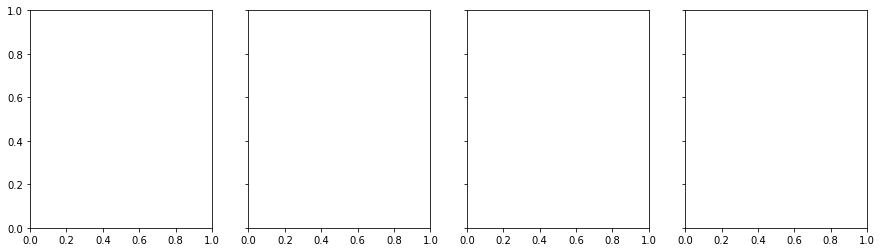

In [ ]:
# Plotting the reference data.
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, sharey=True)

fig.set_figwidth(15)

ax0.imshow(band)
ax0.set_title('Band')

ax1.imshow(prodes)
ax1.set_title('prodes')
    
ax2.imshow(prodes_up)
ax2.set_title('prodes_up')
ax3.imshow(slope)
ax3.set_title('slope')

plt.show()
